<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/Reto%20-%20Entrega%202_prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Reto - Entrega 2**
>### **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: Inteligencia Artificial y Aprendizaje Automático**
>### **Tecnológico de Monterrey**
>### **Prof: María de la Paz Rico Fernández**

### **Genaro Ramos Higuera - A00351269**
### **Gerardo Aaron Castañeda Jaramillo - A01137646**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

In [2]:
url = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/aguas_subterraneas.csv?raw=true'

data_asb = pd.read_csv(url,sep=",")
print(data_asb.shape)
data_asb.head()

(1054, 34)


,CLAVE,LONGITUD,LATITUD,ORGANISMO_DE_CUENCA,SUBTIPO,ALC_mg/L,COND_mS/cm,SDT_M_mg/L,FLUO_mg/L,DUR_mg/L,...,CALIDAD_CF,CALIDAD_NNO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO
0,DLAGU6,-102.02210,22.20887,6.0,5.0,229.990,940.0,603.6,0.9766,213.7320,...,1,1,2,1,1,1,1,1,1,1
1,DLAGU6516,-102.20075,21.99958,6.0,5.0,231.990,608.0,445.4,0.9298,185.0514,...,1,2,2,1,1,1,1,1,1,1
2,DLAGU7,-102.28801,22.36685,6.0,5.0,204.920,532.0,342.0,1.8045,120.7190,...,1,1,3,1,1,1,1,1,1,3
3,DLAGU9,-102.29449,22.18435,6.0,5.0,327.000,686.0,478.6,1.1229,199.8790,...,1,1,2,1,1,1,1,1,1,1
4,DLBAJ107,-110.24480,23.45138,10.0,5.0,309.885,1841.0,1179.0,0.2343,476.9872,...,3,3,1,1,1,1,1,1,1,3


### **Selecciona tus variables independientes X y dependiente Y (semáforo)**

Separamos las columnas en base a su tipo de variable:

In [3]:
#definimos variables numéricas #16
num_nom_geo = ['LONGITUD','LATITUD']
num_nom_cal = ['ALC_mg/L','COND_mS/cm','SDT_M_mg/L','FLUO_mg/L','DUR_mg/L','CF_NMP/100_mL','NNO3_mg/L','AS_TOT_mg/L', 'CD_TOT_mg/L','CR_TOT_mg/L',
               'HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#definimos variables categóricas #16
cat_nom = ['ORGANISMO_DE_CUENCA','SUBTIPO']
cat_nom_cal = ['CALIDAD_ALC','CALIDAD_COND','CALIDAD_SDT','CALIDAD_FLUO','CALIDAD_DUR', 'CALIDAD_CF','CALIDAD_NNO3','CALIDAD_AS',
               'CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
#VARIABLE CATEGORICA DE SALIDA Y  #1
y_nom = ['SEMAFORO']

Generamos los datos en Y, y dos tipos de X. Una donde se utilizaran los datos numericos de calidad, y otra donde se utilizaran los datos categoricos de calidad. Utilizar las variables numericas y categoricas de calidad, donde las categoricas son dependientes de las numericas, puede afectar la correlacion entre variables y eventualmente el modelo. 

In [4]:
Y = data_asb[['SEMAFORO']]

X_num = data_asb[num_nom_geo + cat_nom + num_nom_cal]
X_cat = data_asb[num_nom_geo + cat_nom + cat_nom_cal]

### **Cambia a one hot encoding el semáforo**

Previamente en la parte 1 ya se cambiaron los valores del semaforo a 1:verde, 2:amarillo, 3:rojo

In [5]:
#ohe = OneHotEncoder()
#y_transformed = ohe.fit_transform(Y).toarray()
#y_transformed = pd.DataFrame(y_transformed, columns = ['Verde','Amarillo','Rojo'])
#y_transformed.head(5)

### **Realiza un análisis general de las features importances a traves de decision trees o random forest.**

Definimos modelos a usar:

In [6]:
def get_models():
  modelos = list()
  nombres = list()

  modelos.append(DecisionTreeClassifier())
  nombres.append('DTC')
  
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')
  
  return modelos, nombres

Obtenemos los features importances con variables de calidad numericas:

DTC
LONGITUD: 0.0
LATITUD: 0.01
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
ALC_mg/L: 0.031
COND_mS/cm: 0.056
SDT_M_mg/L: 0.004
FLUO_mg/L: 0.2
DUR_mg/L: 0.148
CF_NMP/100_mL: 0.079
NNO3_mg/L: 0.101
AS_TOT_mg/L: 0.119
CD_TOT_mg/L: 0.0
CR_TOT_mg/L: 0.017
HG_TOT_mg/L: 0.001
PB_TOT_mg/L: 0.013
MN_TOT_mg/L: 0.058
FE_TOT_mg/L: 0.082


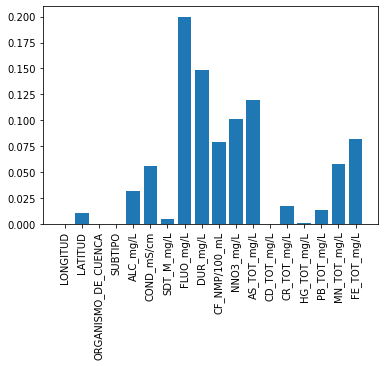

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RFC
LONGITUD: 0.0
LATITUD: 0.001
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
ALC_mg/L: 0.022
COND_mS/cm: 0.01
SDT_M_mg/L: 0.009
FLUO_mg/L: 0.193
DUR_mg/L: 0.139
CF_NMP/100_mL: 0.075
NNO3_mg/L: 0.092
AS_TOT_mg/L: 0.109
CD_TOT_mg/L: 0.0
CR_TOT_mg/L: 0.01
HG_TOT_mg/L: 0.0
PB_TOT_mg/L: 0.007
MN_TOT_mg/L: 0.05
FE_TOT_mg/L: 0.076


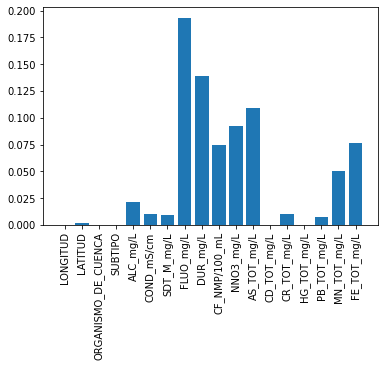

In [7]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_num, Y)
  importance = permutation_importance(modelos[m], X_num, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_num.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_num.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Obtenemos los feature importance con las variables de calidad categoricas:

DTC
LONGITUD: 0.005
LATITUD: 0.003
ORGANISMO_DE_CUENCA: 0.002
SUBTIPO: 0.0
CALIDAD_ALC: 0.031
CALIDAD_COND: 0.059
CALIDAD_SDT: 0.005
CALIDAD_FLUO: 0.199
CALIDAD_DUR: 0.147
CALIDAD_CF: 0.079
CALIDAD_NNO3: 0.099
CALIDAD_AS: 0.117
CALIDAD_CD: 0.0
CALIDAD_CR: 0.021
CALIDAD_HG: 0.0
CALIDAD_PB: 0.012
CALIDAD_MN: 0.055
CALIDAD_FE: 0.078


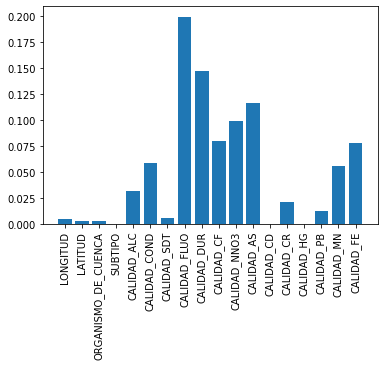

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RFC
LONGITUD: 0.0
LATITUD: 0.002
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
CALIDAD_ALC: 0.025
CALIDAD_COND: 0.011
CALIDAD_SDT: 0.011
CALIDAD_FLUO: 0.197
CALIDAD_DUR: 0.144
CALIDAD_CF: 0.079
CALIDAD_NNO3: 0.099
CALIDAD_AS: 0.106
CALIDAD_CD: 0.0
CALIDAD_CR: 0.015
CALIDAD_HG: 0.0
CALIDAD_PB: 0.009
CALIDAD_MN: 0.055
CALIDAD_FE: 0.078


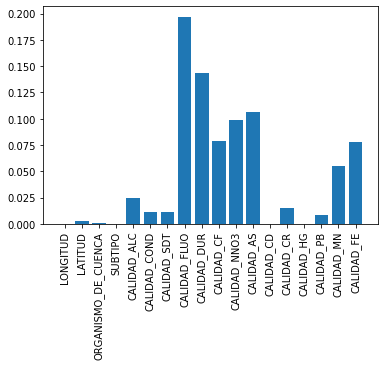

In [8]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_cat, Y)
  importance = permutation_importance(modelos[m], X_cat, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_cat.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_cat.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Y donde observamos que las variables de ubicacion geografica, asi como organismo de cuenca y subtipo no tienen ninguna importancia significativa. Mientras que las de calidad, con algunas excepciones como las de CD y HG, son las que tienen mayor importancia. 

### **Selecciona las variables de mayor importancia.**

Removemos de nuestras listas de columnas las variables que no tienen feature importance

In [9]:
num_nom_cal.remove('CD_TOT_mg/L')
num_nom_cal.remove('HG_TOT_mg/L')
cat_nom_cal.remove('CALIDAD_CD')
cat_nom_cal.remove('CALIDAD_HG')

Observamos con cuales nos quedamos:

In [10]:
print(num_nom_cal)
print(cat_nom_cal)

['ALC_mg/L', 'COND_mS/cm', 'SDT_M_mg/L', 'FLUO_mg/L', 'DUR_mg/L', 'CF_NMP/100_mL', 'NNO3_mg/L', 'AS_TOT_mg/L', 'CR_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']
['CALIDAD_ALC', 'CALIDAD_COND', 'CALIDAD_SDT', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_CF', 'CALIDAD_NNO3', 'CALIDAD_AS', 'CALIDAD_CR', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']


Generamos nuevas dataframes con las columnas a utilizar:

In [11]:
X_num = data_asb[num_nom_cal]
X_cat = data_asb[cat_nom_cal]

### **Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

* Comenzamos con variables numericas:

In [12]:
score_list = list()

In [13]:
def get_scores(yreal, ypred, model, aver='micro'):
  temp_list = list()

  temp_list.append(model)
  accu = accuracy_score(yreal,ypred)
  f1 = f1_score(yreal,ypred,average=aver)
  precision = precision_score(yreal,ypred,average=aver)
  recall = recall_score(yreal,ypred,average=aver)

  temp_list.append(accu)
  temp_list.append(f1)
  temp_list.append(precision)
  temp_list.append(recall)
  print('Accuracy:', accu)
  print('f1_score:', f1)
  print('Precision:', precision)
  print('Recall:', recall)

  return temp_list

Sabemos de la parte 1 que las clases de salida tienen diferentes proporciones, por lo que utilizamos el parametro stratify:

In [14]:
Xtv_num, Xtest_num, ytv_num, ytest_num = train_test_split(X_num, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_num.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_num.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_num.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_num.shape, ': dimensión de variable de salida para prueba')

(895, 12) : dimensión de datos de entrada de entrenamiento y validación
(159, 12) : dimensión de datos de entrada de prueba
(895, 1) : dimensión de variable de salida para entrenamiento y validación
(159, 1) : dimensión de variable de salida para prueba


* Comenzamos con Decision Tree

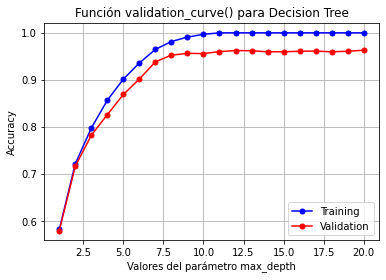

In [15]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

In [16]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid1 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

In [17]:
grid1.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid1.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid1.best_params_)
print('Métrica utilizada:', grid1.scoring)
print('Mejor Index:',grid1.best_index_)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9575418994413406
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Métrica utilizada: accuracy
Mejor Index: 147


In [18]:
model_DTC_num = DecisionTreeClassifier(**grid1.best_params_)

model_DTC_num.fit(Xtv_num, ytv_num)
#realizamos las predicciones
yhat_num = model_DTC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'DTC num'))

Accuracy: 0.9622641509433962
f1_score: 0.9622641509433962
Precision: 0.9622641509433962
Recall: 0.9622641509433962


* Seguimos con Random Forest

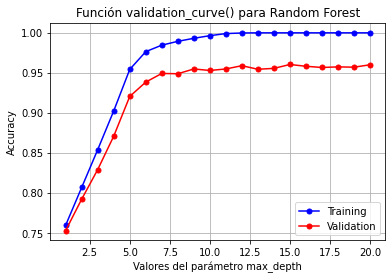

In [19]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

In [20]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid2 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

In [21]:
grid2.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid2.best_params_)
print('Métrica utilizada:', grid2.scoring)
print('Mejor Index:',grid2.best_index_)

Mejor valor de accuracy obtenido con la mejor combinación: 0.955679702048417
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Métrica utilizada: accuracy
Mejor Index: 102


In [22]:
model_RFC_num = RandomForestClassifier(**grid2.best_params_)

model_RFC_num.fit(Xtv_num, np.ravel(ytv_num))
#realizamos las predicciones
yhat_num = model_RFC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'RFC num'))

Accuracy: 0.9622641509433962
f1_score: 0.9622641509433962
Precision: 0.9622641509433962
Recall: 0.9622641509433962


* Comenzamos con variables categoricas:

In [23]:
Xtv_cat, Xtest_cat, ytv_cat, ytest_cat = train_test_split(X_cat, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_cat.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_cat.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_cat.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_cat.shape, ': dimensión de variable de salida para prueba')

(895, 12) : dimensión de datos de entrada de entrenamiento y validación
(159, 12) : dimensión de datos de entrada de prueba
(895, 1) : dimensión de variable de salida para entrenamiento y validación
(159, 1) : dimensión de variable de salida para prueba


* Comenzamos con Decision Tree

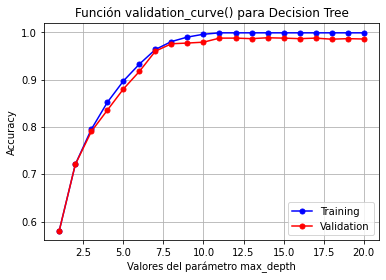

In [24]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

In [25]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid3 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

In [26]:
grid3.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid3.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid3.best_params_)
print('Métrica utilizada:', grid3.scoring)
print('Mejor Index:',grid3.best_index_)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9810055865921787
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Métrica utilizada: accuracy
Mejor Index: 147


In [27]:
model_DTC_cat = DecisionTreeClassifier(**grid3.best_params_)

model_DTC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
#realizamos las predicciones
yhat_num = model_DTC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_num,yhat_num, 'DTC cat'))

Accuracy: 1.0
f1_score: 1.0
Precision: 1.0
Recall: 1.0


* Seguimos con Random Forest

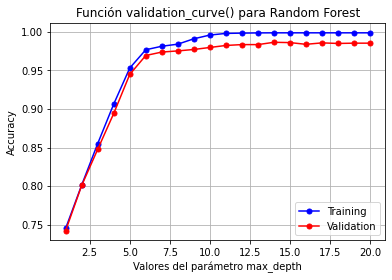

In [28]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

In [29]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid4 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

In [30]:
grid4.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid4.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid4.best_params_)
print('Métrica utilizada:', grid4.scoring)
print('Mejor Index:',grid4.best_index_)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9810055865921787
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 6}
Métrica utilizada: accuracy
Mejor Index: 139


In [31]:
model_RFC_cat = RandomForestClassifier(**grid4.best_params_)

model_RFC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
#realizamos las predicciones
yhat_num = model_RFC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_num,yhat_num, 'RFC cat'))

Accuracy: 1.0
f1_score: 1.0
Precision: 1.0
Recall: 1.0


### **Explora que clasificador es el más optimo, ejemplo:**

Donde en orden son accuracy, f1-score, precision y recall:

In [32]:
score_list

[['DTC num',
  0.9622641509433962,
  0.9622641509433962,
  0.9622641509433962,
  0.9622641509433962],
 ['RFC num',
  0.9622641509433962,
  0.9622641509433962,
  0.9622641509433962,
  0.9622641509433962],
 ['DTC cat', 1.0, 1.0, 1.0, 1.0],
 ['RFC cat', 1.0, 1.0, 1.0, 1.0]]